In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
import os

from scipy import stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import statsmodels.api as sm

import seaborn as sns
is_ipython = 'inline' in matplotlib.get_backend()

In [2]:
path = "./Stats_2/" 
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, header = None) for f in all_files),axis=1)

df = df.T
df = df.rename(columns={0: "Resolution", 1: "Environment Type", 2: "Light Intensity", 3: "Box Bumps", 4: "Wall Bumps", 5: "Loops", 6: "Steps", 7: "Reward", 8: "Threshold"})
df = df.sort_values(["Resolution", "Environment Type", "Light Intensity"], ascending=True)
df = df.replace({"Environment Type": 0}, 'simple')
df = df.replace({"Environment Type": 1}, 'complex')

df = df.reset_index(drop = True)



df_28 = df.drop(df[df.Resolution == 42.0].index)
df_28 = df_28.reset_index(drop = True)

df_42 = df.drop(df[df.Resolution == 28.0].index)

df.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold
0,28.0,simple,0.5,9.6,0.6,1.0,651.8,5186.6,0.344831
1,28.0,simple,0.5,10.4,1.2,0.2,658.6,5166.6,0.386866
2,28.0,simple,0.5,19.2,6.4,4.6,737.4,4717.6,0.505771
3,28.0,simple,1.0,6.0,0.0,0.2,644.6,5323.4,0.560073
4,28.0,simple,1.0,6.6,0.0,0.6,668.6,5281.4,0.649123
5,28.0,simple,1.0,7.6,0.4,0.2,643.8,5269.0,0.627682
6,28.0,simple,1.5,7.0,0.0,0.2,642.2,5295.8,0.544931
7,28.0,simple,1.5,1.8,0.4,0.0,643.0,5447.4,0.621937
8,28.0,simple,1.5,4.4,0.0,0.0,645.4,5370.6,0.548395
9,28.0,complex,0.5,24.8,6.4,3.2,686.8,4481.4,0.472242


In [3]:
path = "./Stats_3/" 
all_files = glob.glob(os.path.join(path, "*.csv"))

df_v = pd.concat((pd.read_csv(f, header = None) for f in all_files),axis=1)

df_v = df_v.T
df_v = df_v.rename(columns={0: "Resolution", 1: "Environment Type", 2: "Light Intensity", 3: "Box Bumps", 4: "Wall Bumps", 5: "Loops", 6: "Steps", 7: "Reward", 8: "Threshold"})
df_v = df_v.sort_values(["Resolution", "Environment Type", "Light Intensity"], ascending=True)
df_v = df_v.replace({"Environment Type": 0}, 'simple')
df_v = df_v.replace({"Environment Type": 1}, 'complex')
df_v["Threshold Value"] = "Opposite"
df_v = df_v.reset_index(drop = True)

df_v.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold,Threshold Value
0,28.0,simple,0.5,38.2,9.4,3.6,671.8,4132.2,0.614436,Opposite
1,28.0,simple,0.5,39.8,7.6,3.0,674.4,4000.6,0.614436,Opposite
2,28.0,simple,0.5,42.0,7.2,5.0,699.0,4056.6,0.614436,Opposite
3,28.0,simple,1.5,2.0,0.0,0.2,642.2,5445.8,0.415144,Opposite
4,28.0,simple,1.5,4.4,0.0,1.8,666.4,5349.6,0.415144,Opposite
5,28.0,simple,1.5,6.4,0.2,0.2,645.4,5307.0,0.415144,Opposite
6,28.0,complex,0.5,53.4,5.8,1.0,608.0,3811.0,0.614436,Opposite
7,28.0,complex,0.5,41.6,14.4,6.6,710.4,3789.0,0.614436,Opposite
8,28.0,complex,0.5,41.8,25.0,14.2,812.8,3090.2,0.614436,Opposite
9,28.0,complex,1.5,5.0,0.4,0.4,643.0,5331.6,0.415144,Opposite


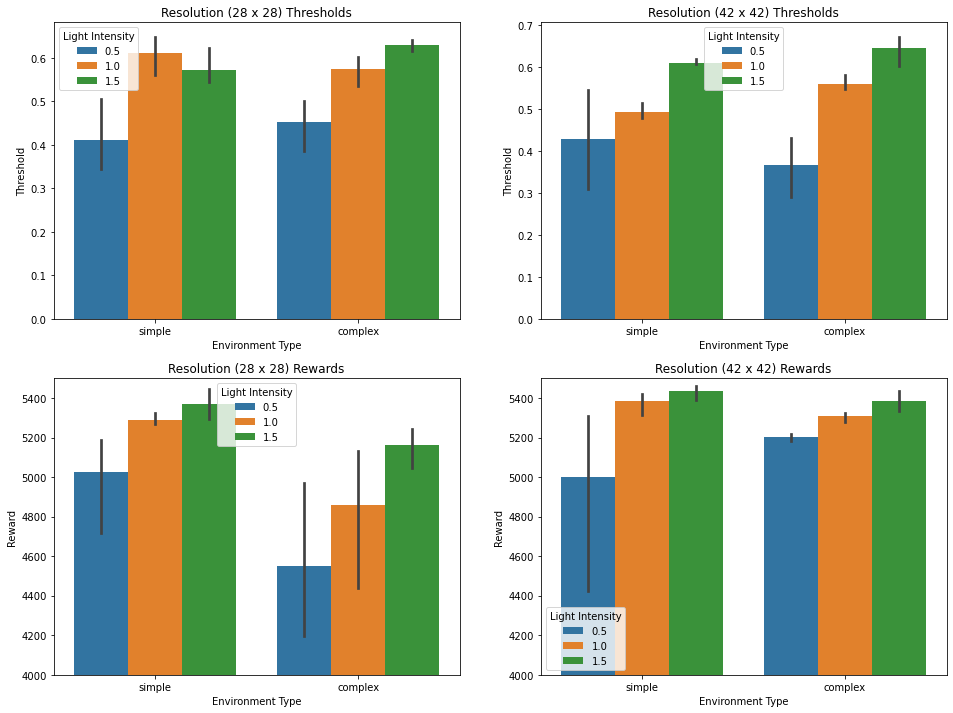

In [4]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(title = "Resolution (28 x 28) Thresholds")
sns.barplot(x="Environment Type",y="Threshold",hue="Light Intensity", data=df_28, ax=axs[0][0])
axs[0][1].set(title = "Resolution (42 x 42) Thresholds")
sns.barplot(x="Environment Type",y="Threshold",hue="Light Intensity", data=df_42, ax=axs[0][1])
axs[1][0].set(ylim=(4000,5500), title="Resolution (28 x 28) Rewards")
sns.barplot(x="Environment Type",y="Reward",hue="Light Intensity", data=df_28, ax=axs[1][0])
axs[1][1].set(ylim=(4000,5500), title="Resolution (42 x 42) Rewards")
sns.barplot(x="Environment Type",y="Reward",hue="Light Intensity", data=df_42, ax=axs[1][1])

plt.show()

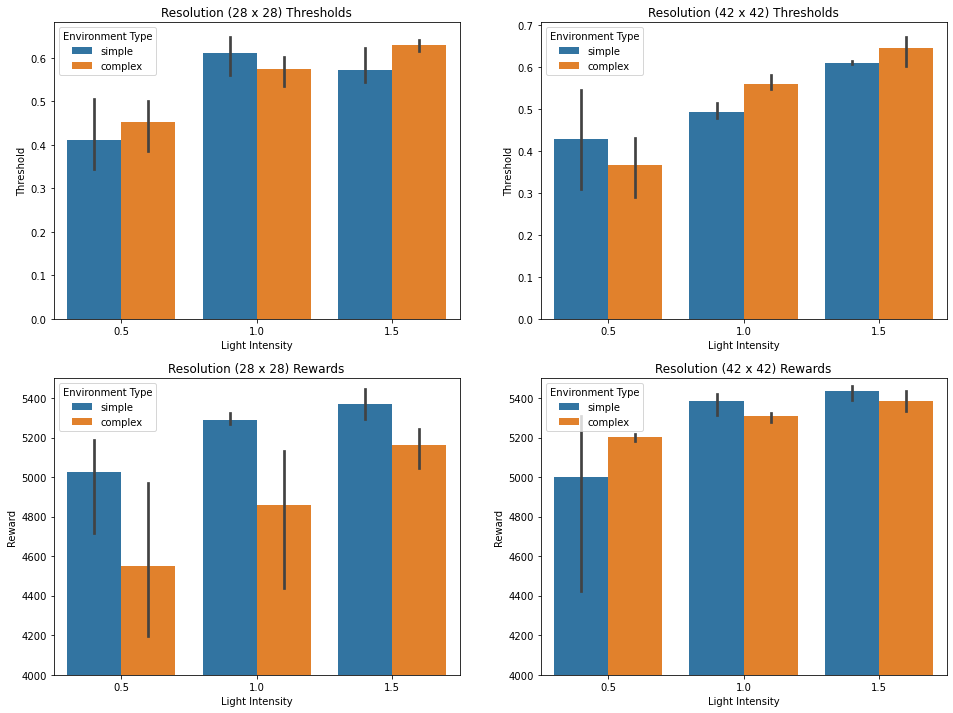

In [5]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(title = "Resolution (28 x 28) Thresholds")
sns.barplot(x="Light Intensity",y="Threshold",hue="Environment Type", data=df_28, ax=axs[0][0])
axs[0][1].set(title = "Resolution (42 x 42) Thresholds")
sns.barplot(x="Light Intensity",y="Threshold",hue="Environment Type", data=df_42, ax=axs[0][1])
axs[1][0].set(ylim=(4000,5500), title="Resolution (28 x 28) Rewards")
sns.barplot(x="Light Intensity",y="Reward",hue="Environment Type", data=df_28, ax=axs[1][0])
axs[1][1].set(ylim=(4000,5500), title="Resolution (42 x 42) Rewards")
sns.barplot(x="Light Intensity",y="Reward",hue="Environment Type", data=df_42, ax=axs[1][1])

plt.show()

In [6]:
df_light_low_high = df[df["Light Intensity"] != 1.0].copy()
df_light_low_high["Threshold Value"] = "Original"
df_light_low_high.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold,Threshold Value
0,28.0,simple,0.5,9.6,0.6,1.0,651.8,5186.6,0.344831,Original
1,28.0,simple,0.5,10.4,1.2,0.2,658.6,5166.6,0.386866,Original
2,28.0,simple,0.5,19.2,6.4,4.6,737.4,4717.6,0.505771,Original
6,28.0,simple,1.5,7.0,0.0,0.2,642.2,5295.8,0.544931,Original
7,28.0,simple,1.5,1.8,0.4,0.0,643.0,5447.4,0.621937,Original
8,28.0,simple,1.5,4.4,0.0,0.0,645.4,5370.6,0.548395,Original
9,28.0,complex,0.5,24.8,6.4,3.2,686.8,4481.4,0.472242,Original
10,28.0,complex,0.5,24.8,16.8,6.8,742.8,4198.6,0.500874,Original
11,28.0,complex,0.5,16.8,1.0,0.6,649.8,4969.0,0.385597,Original
15,28.0,complex,1.5,13.8,1.8,0.4,642.6,5045.4,0.634043,Original


In [7]:
merge = [df_light_low_high, df_v]
df_merged = pd.concat(merge)
df_merged = df_merged.reset_index(drop = True)
df_merged.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold,Threshold Value
0,28.0,simple,0.5,9.6,0.6,1.0,651.8,5186.6,0.344831,Original
1,28.0,simple,0.5,10.4,1.2,0.2,658.6,5166.6,0.386866,Original
2,28.0,simple,0.5,19.2,6.4,4.6,737.4,4717.6,0.505771,Original
3,28.0,simple,1.5,7.0,0.0,0.2,642.2,5295.8,0.544931,Original
4,28.0,simple,1.5,1.8,0.4,0.0,643.0,5447.4,0.621937,Original
5,28.0,simple,1.5,4.4,0.0,0.0,645.4,5370.6,0.548395,Original
6,28.0,complex,0.5,24.8,6.4,3.2,686.8,4481.4,0.472242,Original
7,28.0,complex,0.5,24.8,16.8,6.8,742.8,4198.6,0.500874,Original
8,28.0,complex,0.5,16.8,1.0,0.6,649.8,4969.0,0.385597,Original
9,28.0,complex,1.5,13.8,1.8,0.4,642.6,5045.4,0.634043,Original


<AxesSubplot:xlabel='Light Intensity', ylabel='Reward'>

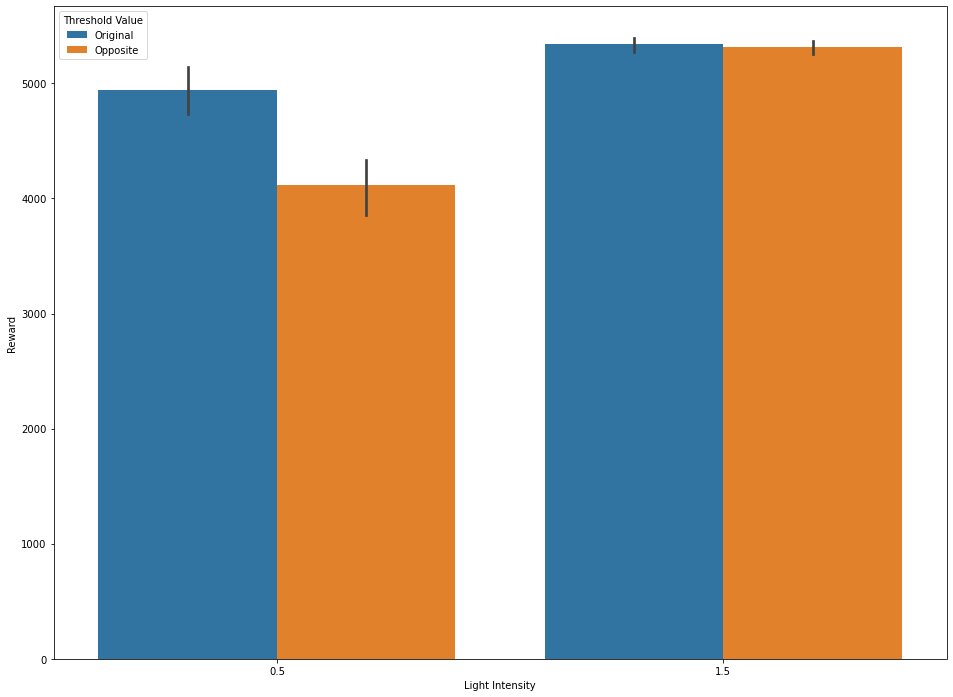

In [8]:
fig,axs = plt.subplots(1,1,figsize=(16,12))
sns.barplot(x="Light Intensity",y="Reward",hue="Threshold Value", data=df_merged, ax=axs)


In [9]:
j = 0
print("Reward value Shapiro-Wilk test")
for i in range(0,8):
    data = [df_v.Reward[j], df_v.Reward[j+1], df_v.Reward[j+2]]
    stat, p = shapiro(data)
    if p > 0.05:
        normal = "  (normal)"
    else:
        normal = "  (non-normal)"
    print(str(df_v.Reward[j]) + " " + str(df_v.Reward[j+1]) + " " + str(df_v.Reward[j+2]) + ", stat = " + str(stat) + ", p = " + str(p) + normal)
    j = j + 3 

Reward value Shapiro-Wilk test
4132.2 4000.6 4056.6, stat = 0.992660403251648, p = 0.8361782431602478  (normal)
5445.8 5349.6 5307.0, stat = 0.9526467323303223, p = 0.5810463428497314  (normal)
3811.0 3789.0 3090.2, stat = 0.7728690505027771, p = 0.05125099793076515  (normal)
5331.6 5265.8 5244.6, stat = 0.9194530248641968, p = 0.45041194558143616  (normal)
4305.4 4480.2 4677.0, stat = 0.9988330602645874, p = 0.9347440004348755  (normal)
5398.2 5342.2 5444.2, stat = 0.9968063831329346, p = 0.8920120596885681  (normal)
4599.4 4431.8 4017.4, stat = 0.9434489011764526, p = 0.5414322018623352  (normal)
5234.2 5091.4 5366.6, stat = 0.9995240569114685, p = 0.9583297371864319  (normal)


In [10]:
comp = sm.stats.multicomp.MultiComparison(df_merged["Reward"], df_merged["Threshold Value"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Opposite,Original,424.2083,0.0097,108.0137,740.403,True


In [11]:
df_v1_5 = df_merged.drop(df_merged[df_merged["Light Intensity"] == 0.5].index)
df_v1_5 = df_v1_5.reset_index(drop = True)

df_v0_5 = df_merged.drop(df_merged[df_merged["Light Intensity"] == 1.5].index)
df_v0_5 = df_v0_5.reset_index(drop = True)
df_v0_5.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold,Threshold Value
0,28.0,simple,0.5,9.6,0.6,1.0,651.8,5186.6,0.344831,Original
1,28.0,simple,0.5,10.4,1.2,0.2,658.6,5166.6,0.386866,Original
2,28.0,simple,0.5,19.2,6.4,4.6,737.4,4717.6,0.505771,Original
3,28.0,complex,0.5,24.8,6.4,3.2,686.8,4481.4,0.472242,Original
4,28.0,complex,0.5,24.8,16.8,6.8,742.8,4198.6,0.500874,Original
5,28.0,complex,0.5,16.8,1.0,0.6,649.8,4969.0,0.385597,Original
6,42.0,simple,0.5,8.0,0.0,0.0,645.0,5263.0,0.431323,Original
7,42.0,simple,0.5,5.8,0.8,0.2,642.4,5308.2,0.309842,Original
8,42.0,simple,0.5,18.4,11.6,7.8,743.2,4426.2,0.544585,Original
9,42.0,complex,0.5,9.6,1.6,0.4,641.6,5184.2,0.289673,Original


In [12]:
df_v1_5.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold,Threshold Value
0,28.0,simple,1.5,7.0,0.0,0.2,642.2,5295.8,0.544931,Original
1,28.0,simple,1.5,1.8,0.4,0.0,643.0,5447.4,0.621937,Original
2,28.0,simple,1.5,4.4,0.0,0.0,645.4,5370.6,0.548395,Original
3,28.0,complex,1.5,13.8,1.8,0.4,642.6,5045.4,0.634043,Original
4,28.0,complex,1.5,10.2,0.2,0.0,634.8,5205.4,0.616961,Original
5,28.0,complex,1.5,8.6,0.2,0.0,644.0,5244.2,0.640276,Original
6,42.0,simple,1.5,3.6,0.4,0.6,643.8,5392.6,0.606112,Original
7,42.0,simple,1.5,1.8,0.0,0.0,640.2,5453.8,0.618102,Original
8,42.0,simple,1.5,1.6,0.0,0.0,639.8,5460.2,0.607398,Original
9,42.0,complex,1.5,2.4,0.0,0.0,640.2,5435.8,0.603255,Original


In [17]:
comp = sm.stats.multicomp.MultiComparison(df_v1_5["Reward"], df_v1_5["Threshold Value"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Opposite,Original,20.2333,0.6758,-75.0675,115.5341,False


In [18]:
comp = sm.stats.multicomp.MultiComparison(df_v0_5["Reward"], df_v0_5["Threshold Value"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Opposite,Original,828.1833,0.001,479.4973,1176.8694,True
